**Dataset**
labeled datasset collected from twitter (Lab 1 - Hate Speech.tsv)

**Objective**
classify tweets containing hate speech from other tweets. <br>
0 -> no hate speech <br>
1 -> contains hate speech <br>


**Evaluation metric**
macro f1 score

### Import used libraries

In [ ]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 8.1 MB/s eta 0:00:00


In [ ]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 11.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import nltk
import string
import re
import contractions
import emoji
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 500)
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Load Dataset

###### Note: search how to load the data from tsv file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/Hate Speech.tsv", sep= "\t", index_col='id')
df.head(50)

,label,tweet
id,,
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
3,0,bihday your majesty
4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
5,0,factsguide: society now #motivation
6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦


In [ ]:

df.count()

,0
label,31535
tweet,31535


In [ ]:
df.shape

(31535, 2)

### Data splitting

It is a good practice to split the data before EDA helps maintain the integrity of the machine learning process, prevents data leakage, simulates real-world scenarios more accurately, and ensures reliable model performance evaluation on unseen data.

In [ ]:
X=df.drop('label',axis=1)
y=df['label']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df['tweet'],df['label'],test_size=.2,random_state=42)

In [ ]:
print("Shape of X_train",X_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (25228,)
Shape of X_test (6307,)
Shape of y_train (25228,)
Shape of y_test (6307,)


In [ ]:
X_train.head()

,tweet
id,
17502,big shout out to @user who replaced my hard used jacket under warranty. looking forward to breaking it in on the wet coast!
8515,#happy #monday! no #need or #reason to #feel or #cry ever #again. #god has #fulfilled his #promise to us #all! have and #awesome day!
13146,"check out all the stars who made our sister team, @user"
26036,awesome -- it's the rare wildly hyped phenomenon that actually lives up to the hype.
9420,jamming to the new @user song my day is made! #hcr #floatyourboat #yesssssâ¦


### EDA on training data

- check NaNs

In [ ]:
print("null of X_train",X_train.isnull().sum())
print("null of y_train",y_train.isnull().sum())
print("null of X_test",X_test.isnull().sum())
print("null of y_test",y_test.isnull().sum())

null of X_train 0
null of y_train 0
null of X_test 0
null of y_test 0


- check duplicates

In [ ]:
print("null of X_train",X_train.duplicated().sum())
print("null of X_test",X_test.duplicated().sum())


null of X_train 1780
null of X_test 266


In [ ]:
train_df = pd.DataFrame({'tweet': X_train, 'label': y_train})


In [ ]:
train_df= train_df.drop_duplicates(subset=['tweet', 'label'])
train_df.shape

(23449, 2)

In [ ]:
X_train = train_df['tweet']
y_train= train_df['label']

In [ ]:
print("Shape of X_train",X_train.shape)

print("Shape of y_train",y_train.shape)

Shape of X_train (23449,)
Shape of y_train (23449,)


- show a representative sample of data texts to find out required preprocessing steps

In [ ]:
y_train

,label
id,
17502,0
8515,0
13146,0
26036,0
9420,0
...,...
30230,0
5515,0
861,1


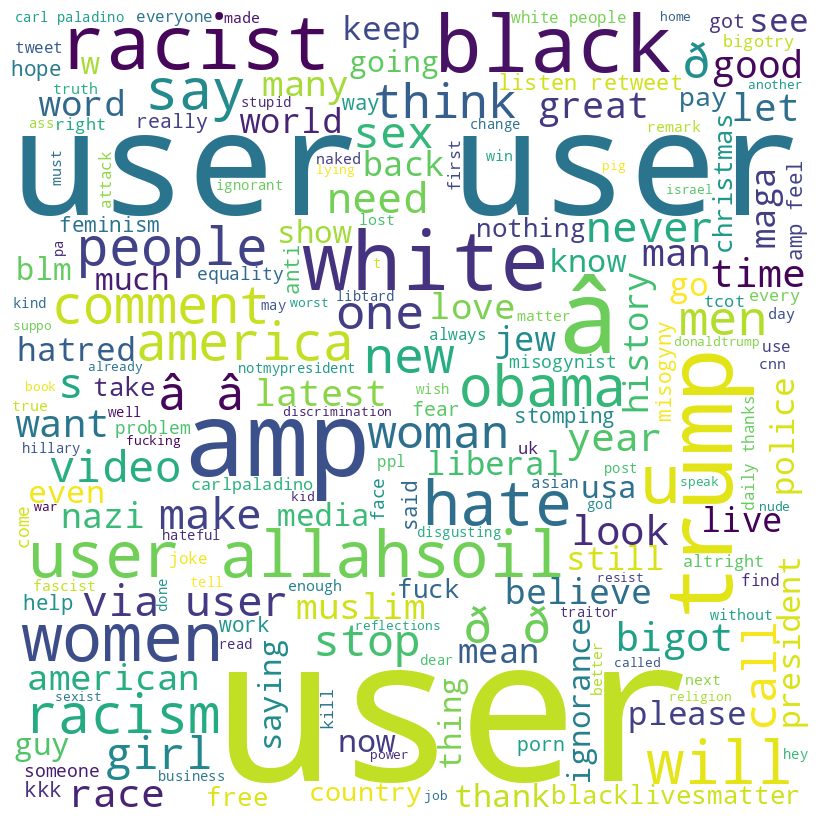

In [ ]:
#word coud
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(" ".join(X_train[y_train==1]))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()




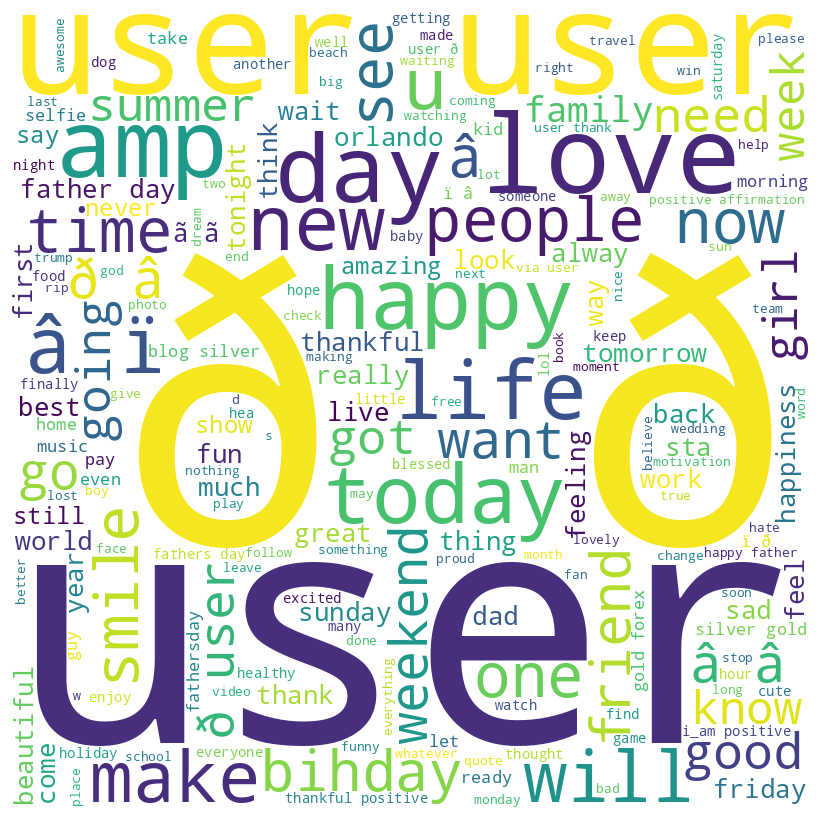

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(" ".join(X_train[y_train==0]))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [ ]:
X_train.head(10)

,tweet
id,
17502,big shout out to @user who replaced my hard used jacket under warranty. looking forward to breaking it in on the wet coast!
8515,#happy #monday! no #need or #reason to #feel or #cry ever #again. #god has #fulfilled his #promise to us #all! have and #awesome day!
13146,"check out all the stars who made our sister team, @user"
26036,awesome -- it's the rare wildly hyped phenomenon that actually lives up to the hype.
9420,jamming to the new @user song my day is made! #hcr #floatyourboat #yesssssâ¦
13139,going through a major transition in my life. this seems so on point for me. happy sunday all x
20181,@user i'm @user cause i didn't get a bunt cake... #twitterwarnumber3
19769,"@user @user @user @user wow, is $10k all it takes to buy the opinion of a member of congress? b/c that's just sad."
28070,#bihday to me ð


- check dataset balancing

In [ ]:
y_train.value_counts().values

array([21837,  1612])

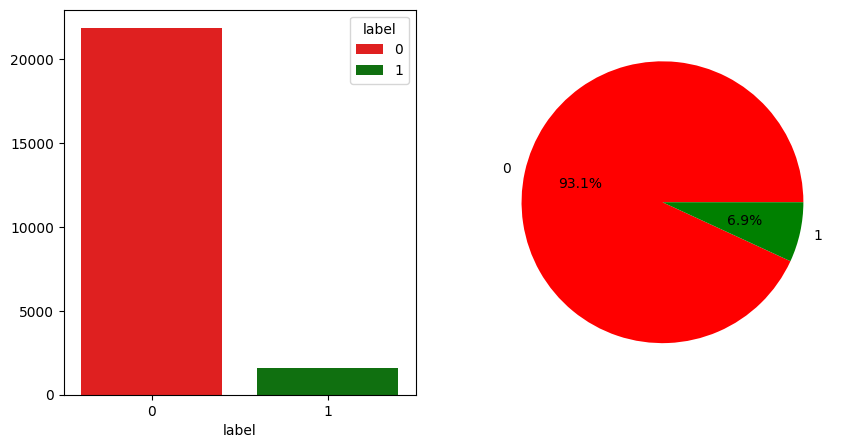

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.barplot(x=y_train.value_counts().index, y=y_train.value_counts().values,hue=y_train.value_counts().index,palette=['r','g'])

plt.subplot(1,2,2)
plt.pie(y_train.value_counts().values, labels=y_train.value_counts().index, autopct='%1.1f%%',colors=['r','g'])
plt.show()

- Cleaning and Preprocessing are:
    - 1
    - 2
    - 3
    - ... etc.

### Cleaning and Preprocessing

#### Extra: use custom scikit-learn Transformers

Using custom transformers in scikit-learn provides flexibility, reusability, and control over the data transformation process, allowing you to seamlessly integrate with scikit-learn's pipelines, enabling you to combine multiple preprocessing steps and modeling into a single workflow. This makes your code more modular, readable, and easier to maintain.

##### link: https://www.andrewvillazon.com/custom-scikit-learn-transformers/

#### Example usage:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class PreprocessingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, text):
        self.text=text
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def get_wordnet_pos(self, word):
        """Map POS tag to WordNet POS tags for lemmatization."""
        tag = pos_tag([word])[0][1][0].upper()
        tag_dict = {
            'J': wordnet.ADJ,
            'N': wordnet.NOUN,
            'V': wordnet.VERB,
            'R': wordnet.ADV
        }
        return tag_dict.get(tag, wordnet.NOUN)


    def clean_text(self, text, y=None):
        # The input to clean_text is now 'text', a single string value
        # No need for copy() as strings are immutable
        text=text.lower()
        text=contractions.fix(text)
        text=emoji.demojize(text)
        text=text.replace(":", " ").replace("_", " ")
        text=re.sub(r'https?:\/\/\S+', '', text)
        text = re.sub(r'@\w+', '', text)
        text = re.sub(r'#\w+', '', text)
        text=text.translate(str.maketrans('', '', string.punctuation))
        text=re.sub(r'\d+', '', text)
        text=text.encode('ascii', 'ignore').decode('ascii') # fixed line using encode/decode to remove non-ascii
        text = re.sub(r'\s+', ' ', text).strip()
        stop_words = set(stopwords.words('english'))
        text = ' '.join([word for word in text.split() if word not in stop_words])
        tokens = word_tokenize(text)
        tokens = [
            self.lemmatizer.lemmatize(word, self.get_wordnet_pos(word))
            for word in tokens if word not in self.stop_words
        ]

        return ' '.join(tokens)

    def fit(self, X, y=None):

        return self

    def transform(self, X):

        return X.apply(self.clean_text)

    def fit_transform(self, X, y=None):

        self.fit(X, y)
        return self.transform(X)

In [ ]:
vectorizer= TfidfVectorizer(max_features=1000,ngram_range=(1,2))

### **Embdding using vectorizer**

TFIDF

In [ ]:
class Tfidvectorizer(BaseEstimator, TransformerMixin):
    def __init__(self,vectorizer):
        self.vectorizer=vectorizer
    def fit(self,x):

        return self.vectorizer.fit(x.astype(str))
    def transform(self,x):

        return self.vectorizer.transform(x.astype(str))

    def fit_transform(self,x,y=None):

        return self.vectorizer.fit_transform(x.astype(str))

In [ ]:
pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install --upgrade --force-reinstall gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling nu

Word2Vec

In [ ]:
from gensim.models import Word2Vec
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class Word2VecVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, method='cbow', size=100, window=5, min_count=1):
        self.method = method
        self.size = size
        self.window = window
        self.min_count = min_count

    def fit(self, X, y=None):
        tokens = [nltk.word_tokenize(text) for text in X]
        sg = 1 if self.method == 'skipgram' else 0
        self.w2v_model = Word2Vec(sentences=tokens, vector_size=self.size, window=self.window,
                                  min_count=self.min_count, sg=sg)
        return self

    def transform(self, X):
        tokens = [nltk.word_tokenize(text) for text in X]
        features = []
        for sentence in tokens:
            vecs = [self.w2v_model.wv[word] for word in sentence if word in self.w2v_model.wv]
            if vecs:
                features.append(np.mean(vecs, axis=0))
            else:
                features.append(np.zeros(self.size))
        return np.array(features)






Glove

In [ ]:
class GloVeVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, glove_path, dim=100):
        self.glove_path = glove_path
        self.dim = dim

    def fit(self, X, y=None):
        self.embeddings = {}
        with open(self.glove_path, 'r', encoding='utf-8') as f:
            for line in f:
                parts = line.strip().split()
                word = parts[0]
                vector = np.array(parts[1:], dtype=np.float32)
                self.embeddings[word] = vector
        return self

    def transform(self, X):
        vectors = []
        for text in X:
            tokens = nltk.word_tokenize(text)
            vecs = [self.embeddings.get(word, np.zeros(self.dim)) for word in tokens]
            if vecs:
                vectors.append(np.mean(vecs, axis=0))
            else:
                vectors.append(np.zeros(self.dim))
        return np.array(vectors)

FastText

In [ ]:
from gensim.models import FastText

class FastTextVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, size=100, window=5, min_count=1):
        self.size = size
        self.window = window
        self.min_count = min_count

    def fit(self, X, y=None):
        tokens = [nltk.word_tokenize(text) for text in X]
        self.ft_model = FastText(sentences=tokens, vector_size=self.size, window=self.window,
                                 min_count=self.min_count)
        return self

    def transform(self, X):
        tokens = [nltk.word_tokenize(text) for text in X]
        features = []
        for sentence in tokens:
            vecs = [self.ft_model.wv[word] for word in sentence if word in self.ft_model.wv]
            if vecs:
                features.append(np.mean(vecs, axis=0))
            else:
                features.append(np.zeros(self.size))
        return np.array(features)


**You  are doing Great so far!**

### Modelling

#### Extra: use scikit-learn pipline

##### link: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

Using pipelines in scikit-learn promotes better code organization, reproducibility, and efficiency in machine learning workflows.

#### Example usage:

using TFIDF

In [ ]:



models = {
    "LogisticRegression": LogisticRegression(),
    "BernoulliNB": BernoulliNB(),
    "SVC": SVC(),
    "RandomForestClassifier":RandomForestClassifier()

}
# Create the pipeline

pipelines_tf = {}

for name, model in models.items():
    pipeline_tf = Pipeline(steps=[
        ('preprocessing', PreprocessingTransformer(text='tweet')),
        ('vectorizer', vectorizer),
        ('model', model),
    ])

    pipeline_tf.fit(X_train, y_train)
    pipelines_tf[name] = pipeline_tf
    print(f"{name} model trained.")




LogisticRegression model trained.
BernoulliNB model trained.
SVC model trained.
RandomForestClassifier model trained.


using word2vec CBOW

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


models = {
    "LogisticRegression": LogisticRegression(),
    "BernoulliNB": BernoulliNB(),
    "SVC": SVC(),
    "RandomForestClassifier":RandomForestClassifier()
}
# Create the pipeline

pipelines_wv1 = {}

for name, model in models.items():
    pipeline_wv1 = Pipeline(steps=[
        ('preprocessing', PreprocessingTransformer(text='tweet')),
        # Initialize Word2VecVectorizer with desired parameters
        ('vectorizer', Word2VecVectorizer(method='cbow', size=100, window=5, min_count=1)),
        ('model', model),
    ])

    pipeline_wv1.fit(X_train, y_train)
    pipelines_wv1[name] = pipeline_wv1
    print(f"{name} model trained.")


LogisticRegression model trained.
BernoulliNB model trained.
SVC model trained.
RandomForestClassifier model trained.


using Word2vec skip gram

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


models = {
    "LogisticRegression": LogisticRegression(),
    "BernoulliNB": BernoulliNB(),
    "SVC": SVC(),
    "RandomForestClassifier":RandomForestClassifier()
}
# Create the pipeline

pipelines_wv2 = {}

for name, model in models.items():
    pipeline_wv2 = Pipeline(steps=[
        ('preprocessing', PreprocessingTransformer(text='tweet')),
        # Initialize Word2VecVectorizer with desired parameters
        ('vectorizer', Word2VecVectorizer(method='skipgram', size=100, window=5, min_count=1)),
        ('model', model),
    ])

    pipeline_wv2.fit(X_train, y_train)
    pipelines_wv2[name] = pipeline_wv2
    print(f"{name} model trained.")


LogisticRegression model trained.
BernoulliNB model trained.
SVC model trained.
RandomForestClassifier model trained.


using FastText

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


models = {
    "LogisticRegression": LogisticRegression(),
    "BernoulliNB": BernoulliNB(),
    "SVC": SVC(),
    "RandomForestClassifier":RandomForestClassifier()
}
# Create the pipeline

pipelines_ft = {}

for name, model in models.items():
    pipeline_ft = Pipeline(steps=[
        ('preprocessing', PreprocessingTransformer(text='tweet')),
        # Initialize Word2VecVectorizer with desired parameters
        ('vectorizer', FastTextVectorizer(size=100, window=5, min_count=1)),
        ('model', model),
    ])

    pipeline_ft.fit(X_train, y_train)
    pipelines_ft[name] = pipeline_ft
    print(f"{name} model trained.")


LogisticRegression model trained.
BernoulliNB model trained.
SVC model trained.
RandomForestClassifier model trained.


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-04-11 16:20:45--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-11 16:20:45--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-11 16:20:46--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

using Glove

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


models = {
    "LogisticRegression": LogisticRegression(class_weight='balanced'),
    "BernoulliNB": BernoulliNB(),
    "SVC": SVC(class_weight='balanced'),
    "RandomForestClassifier":RandomForestClassifier(class_weight='balanced')
}
# Create the pipeline

pipelines_gv = {}

for name, model in models.items():
    pipeline_gv = Pipeline(steps=[
        ('preprocessing', PreprocessingTransformer(text='tweet')),
        # Initialize GloVeVectorizer with the correct arguments 'glove_path' and 'dim'
        # Assuming 'glove.txt' is the path to your GloVe embeddings file
        ('vectorizer', GloVeVectorizer(glove_path='glove.6B.100d.txt', dim=100)),
        ('model', model),
    ])

    pipeline_gv.fit(X_train, y_train)
    pipelines_gv[name] = pipeline_gv
    print(f"{name} model trained.")


LogisticRegression model trained.
BernoulliNB model trained.
SVC model trained.
RandomForestClassifier model trained.


In [ ]:
pipelines_ft

{'LogisticRegression': Pipeline(steps=[('preprocessing', PreprocessingTransformer(text='tweet')),
                 ('vectorizer', FastTextVectorizer()),
                 ('model', LogisticRegression())]),
 'BernoulliNB': Pipeline(steps=[('preprocessing', PreprocessingTransformer(text='tweet')),
                 ('vectorizer', FastTextVectorizer()),
                 ('model', BernoulliNB())]),
 'SVC': Pipeline(steps=[('preprocessing', PreprocessingTransformer(text='tweet')),
                 ('vectorizer', FastTextVectorizer()), ('model', SVC())]),
 'RandomForestClassifier': Pipeline(steps=[('preprocessing', PreprocessingTransformer(text='tweet')),
                 ('vectorizer', FastTextVectorizer()),
                 ('model', RandomForestClassifier())])}

#### Evaluation

**Evaluation metric:**
macro f1 score

Macro F1 score is a useful metric in scenarios where you want to evaluate the overall performance of a multi-class classification model, **particularly when the classes are imbalanced**

![Calculation](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/639c3d934e82c1195cdf3c60_macro-f1.webp)

**Evaluation TFIDF Vectorizer**

In [ ]:
for name, model in pipelines_ft.items():
    y_pred_tf = pipelines_ft[name].predict(X_test) # Changed pipeline_tf to pipelines_ft
    print(name)
    report=classification_report(y_pred_tf,y_test)
    print(report)
    print("-"*30)

LogisticRegression
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      6307
           1       0.00      0.00      0.00         0

    accuracy                           0.93      6307
   macro avg       0.50      0.47      0.48      6307
weighted avg       1.00      0.93      0.96      6307

------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


BernoulliNB
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      6061
           1       0.07      0.13      0.09       246

    accuracy                           0.90      6307
   macro avg       0.52      0.53      0.52      6307
weighted avg       0.93      0.90      0.92      6307

------------------------------
SVC
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      6307
           1       0.00      0.00      0.00         0

    accuracy                           0.93      6307
   macro avg       0.50      0.47      0.48      6307
weighted avg       1.00      0.93      0.96      6307

------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      6162
           1       0.32      0.96      0.48       145

    accuracy                           0.95      6307
   macro avg       0.66      0.96      0.73      6307
weighted avg       0.98      0.95      0.96      6307

------------------------------


**Evaluation Word2Vec using CBOW**

In [ ]:
for name, model in pipelines_wv1.items():
    y_pred_wv1 = pipelines_wv1[name].predict(X_test)
    print(name)
    report=classification_report(y_pred_wv1,y_test)
    print(report)
    print("-"*30)

LogisticRegression
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      6307
           1       0.00      0.00      0.00         0

    accuracy                           0.93      6307
   macro avg       0.50      0.47      0.48      6307
weighted avg       1.00      0.93      0.96      6307

------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


BernoulliNB
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      6248
           1       0.02      0.17      0.04        59

    accuracy                           0.93      6307
   macro avg       0.51      0.55      0.50      6307
weighted avg       0.98      0.93      0.95      6307

------------------------------
SVC
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      6307
           1       0.00      0.00      0.00         0

    accuracy                           0.93      6307
   macro avg       0.50      0.47      0.48      6307
weighted avg       1.00      0.93      0.96      6307

------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      6158
           1       0.33      0.95      0.49       149

    accuracy                           0.95      6307
   macro avg       0.66      0.95      0.73      6307
weighted avg       0.98      0.95      0.96      6307

------------------------------


**Evaluation word2vec using skip gram**

In [ ]:
for name, model in pipelines_wv2.items():
    y_pred_wv2 = pipelines_wv2[name].predict(X_test)
    print(name)
    report=classification_report(y_pred_wv2,y_test)
    print(report)
    print("-"*30)

LogisticRegression
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      6287
           1       0.02      0.50      0.04        20

    accuracy                           0.93      6307
   macro avg       0.51      0.72      0.50      6307
weighted avg       1.00      0.93      0.96      6307

------------------------------
BernoulliNB
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5302
           1       0.41      0.18      0.25      1005

    accuracy                           0.83      6307
   macro avg       0.63      0.56      0.57      6307
weighted avg       0.79      0.83      0.80      6307

------------------------------
SVC
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      6307
           1       0.00      0.00      0.00         0

    accuracy                           0.93      6307
   macro avg       0.50      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      6139
           1       0.36      0.93      0.52       168

    accuracy                           0.95      6307
   macro avg       0.68      0.94      0.75      6307
weighted avg       0.98      0.95      0.96      6307

------------------------------


**Evaluation FastText**

In [ ]:
for name, model in pipelines_ft.items():
    y_pred_ft= pipelines_ft[name].predict(X_test)
    print(name)
    report=classification_report(y_pred_ft,y_test)
    print(report)
    print("-"*30)

LogisticRegression
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      6307
           1       0.00      0.00      0.00         0

    accuracy                           0.93      6307
   macro avg       0.50      0.47      0.48      6307
weighted avg       1.00      0.93      0.96      6307

------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


BernoulliNB
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      6061
           1       0.07      0.13      0.09       246

    accuracy                           0.90      6307
   macro avg       0.52      0.53      0.52      6307
weighted avg       0.93      0.90      0.92      6307

------------------------------
SVC
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      6307
           1       0.00      0.00      0.00         0

    accuracy                           0.93      6307
   macro avg       0.50      0.47      0.48      6307
weighted avg       1.00      0.93      0.96      6307

------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      6162
           1       0.32      0.96      0.48       145

    accuracy                           0.95      6307
   macro avg       0.66      0.96      0.73      6307
weighted avg       0.98      0.95      0.96      6307

------------------------------


**Evaluation Glove**

In [ ]:
for name, model in pipelines_gv.items():
    y_pred_gv = pipelines_gv[name].predict(X_test)
    print(name)
    report=classification_report(y_pred_gv,y_test)
    print(report)
    print("-"*30)

LogisticRegression
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      4796
           1       0.75      0.21      0.33      1511

    accuracy                           0.79      6307
   macro avg       0.77      0.60      0.61      6307
weighted avg       0.79      0.79      0.75      6307

------------------------------
BernoulliNB
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5796
           1       0.32      0.27      0.29       511

    accuracy                           0.89      6307
   macro avg       0.63      0.61      0.62      6307
weighted avg       0.89      0.89      0.89      6307

------------------------------
SVC
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      5158
           1       0.77      0.29      0.42      1149

    accuracy                           0.85      6307
   macro avg       0.81      0.

### Enhancement

- Using different vectorizers with different hyperparameters
- Trying different ML models and doing hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Define vectorizers
vectorizers = {
    "TF-IDF": TfidfVectorizer(max_features=500, ngram_range=(2, 2)),
    "Word2Vec_CBOW": Word2VecVectorizer(method='cbow', size=500, window=4, min_count=2),
    "Word2Vec": Word2VecVectorizer(method='skipgram', size=500, window=4, min_count=2),
    "GloVe": GloVeVectorizer(glove_path='glove.6B.200d.txt', dim=200),
    "FastText": FastTextVectorizer(size=500, window=4, min_count=2)
}

# Define models and their hyperparameters
models_and_params = {
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000,class_weight='balanced'),
        "params": {
            'model__C': [0.01, 0.1, 1]
        }
    },
    "BernoulliNB": {
        "model": BernoulliNB(),
        "params": {
            'model__alpha': [0.1, 0.5, 1.0]
        }
    },
    "SVC": {
        "model": SVC(class_weight='balanced'),
        "params": {
            'model__C': [0.1, 1, 10],
            'model__kernel': ['linear', 'rbf']
        }
    },
    "RandomForestClassifier": {
        "model": RandomForestClassifier(class_weight='balanced'),
        "params": {
            'model__n_estimators': [100, 200],
            'model__max_depth': [50, 10]
        }
    }
}

# Create scorer using macro F1
macro_f1 = make_scorer(f1_score, average='macro')

# Store the best models for each combination
best_models = {}

for vectorizer_name, vectorizer in vectorizers.items():
    for name, config in models_and_params.items():
        print(f"Training {name} with {vectorizer_name}...")

        # Create the pipeline with dynamic vectorizer
        pipe = Pipeline([
            ('preprocessing', PreprocessingTransformer(text='tweet')),
            ('vectorizer', vectorizer),
            ('model', config["model"])
        ])

        # Perform GridSearchCV for hyperparameter tuning
        grid = GridSearchCV(pipe, config["params"], scoring=macro_f1, cv=5)
        grid.fit(X_train, y_train)

        # Store the best model
        best_models[f"{name}_{vectorizer_name}"] = grid
        print(f"{name} with {vectorizer_name} best params: {grid.best_params_}")
        print(f"{name} with {vectorizer_name} best macro F1 on training set: {grid.best_score_:.4f}\n")


Training LogisticRegression with TF-IDF...
LogisticRegression with TF-IDF best params: {'model__C': 0.1}
LogisticRegression with TF-IDF best macro F1 on training set: 0.4119

Training BernoulliNB with TF-IDF...
BernoulliNB with TF-IDF best params: {'model__alpha': 0.1}
BernoulliNB with TF-IDF best macro F1 on training set: 0.5259

Training SVC with TF-IDF...
SVC with TF-IDF best params: {'model__C': 0.1, 'model__kernel': 'linear'}
SVC with TF-IDF best macro F1 on training set: 0.5310

Training RandomForestClassifier with TF-IDF...
RandomForestClassifier with TF-IDF best params: {'model__max_depth': 10, 'model__n_estimators': 200}
RandomForestClassifier with TF-IDF best macro F1 on training set: 0.5291

Training LogisticRegression with Word2Vec_CBOW...
LogisticRegression with Word2Vec_CBOW best params: {'model__C': 0.01}
LogisticRegression with Word2Vec_CBOW best macro F1 on training set: 0.4493

Training BernoulliNB with Word2Vec_CBOW...
BernoulliNB with Word2Vec_CBOW best params: {'mo

### **CNN**

In [ ]:
cleaner=text_cleaner =  CustomTransformer(text_column='tweet', return_tokens=True, join_tokens=True)
x_train_cleaned=cleaner.transform(X_train)
x_test_cleaned=cleaner.transform(X_test)

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer=Tokenizer(num_words=19000)
tokenizer.fit_on_texts(x_train_cleaned)
word_index = tokenizer.word_index

x_train_tokenized = tokenizer.texts_to_sequences(x_train_cleaned)
x_test_tokenized = tokenizer.texts_to_sequences(x_test_cleaned)

from keras.preprocessing.sequence import pad_sequences
x_train_padded=pad_sequences(x_train_tokenized,maxlen=100,padding='post',truncating='post')
x_test_padded=pad_sequences(x_test_tokenized,maxlen=100,padding='post',truncating='post')

VOCAB_SIZE = len(word_index) + 1
print(f' VOCAB_SIZE : {VOCAB_SIZE}')


 VOCAB_SIZE : 35545


In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

model = Sequential([
   tf.keras.layers.Embedding(input_dim=10000, output_dim=16, input_length=100),

    # CNN layer with filters and kernel size
    tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),  # Captures the most prominent feature

    # Dense layers
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dropout(0.3),

    # Output layer for binary classification
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train_padded, y_train,
                    epochs=30,
                    validation_data=(x_test_padded, y_test),
                    batch_size=64)

Epoch 1/30
367/367 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9211 - loss: 0.2989 - val_accuracy: 0.9524 - val_loss: 0.1406
Epoch 2/30
367/367 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9628 - loss: 0.1066 - val_accuracy: 0.9635 - val_loss: 0.1148
Epoch 3/30
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9800 - loss: 0.0607 - val_accuracy: 0.9635 - val_loss: 0.1291
Epoch 4/30
367/367 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9886 - loss: 0.0354 - val_accuracy: 0.9640 - val_loss: 0.1483
Epoch 5/30
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9937 - loss: 0.0234 - val_accuracy: 0.9646 - val_loss: 0.2098
Epoch 6/30
367/367 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9964 - loss: 0.0124 - val_accuracy: 0.9637 - val_loss: 0.2307
Epoch 7/30
367/367 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9977 - loss: 0.0074 - val_accuracy: 0.9619 - val_loss: 0.2791
Epoch 8/30
367/367 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9982 - loss: 0.0064 - val_accuracy: 0

In [ ]:
model.evaluate(x_test_padded,y_test)

198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9600 - loss: 0.6330


[0.6386597752571106, 0.9613128304481506]

In [ ]:
y_pred=model.predict(x_test_padded)
y_pred = (y_pred > 0.5).astype(int)

198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5875
           1       0.76      0.64      0.69       432

    accuracy                           0.96      6307
   macro avg       0.87      0.81      0.84      6307
weighted avg       0.96      0.96      0.96      6307



#### Done!